<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Dog_VS_Cat_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will fetch the dogs vs cats data from kaggle with the help of API provided in dataset section.First of all we will upload the json file downloaded from kaggle.Download and upload any image of cat and dog in this workbook so as to test the model on unseen data.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats
#This is the api which helps us in downloading the dataset from kaggle and store it in google collab

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
#These 4 lines of code will unzip downloaded dataset.
#We get 2 folders of train and test data.

Problem Statement-We have a collection of images of Dogs and Cats,and we have to build a CNN model which will help us in predicting a new image whether Image is of Dog or Cat.

In [4]:
#Importing dependencies
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#We have a huge image data so working with whole data is not computationally efficient.
#SO what we do is that we divide the data into smaller batches of data.So when we work on data , we load only one batch of data
#once the work with that batch is over then this batch will be removed from RAM and new batch
#of data will be loaded in RAM.
#This is done with the help of Generator.

In [6]:
#Defining Generator for train data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', #This will assign cat as 0 and dog as 1
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int', #This will assign cat as 0 and dog as 1
    batch_size=32,
    image_size=(256,256)
)

#So there are 20000 files in train dataset with two classes of dog and cat
#And there are 5000 files in validation dataset with two classes of dog and cat

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalization of image from 0 to 255 to 0 to 1:

In [7]:
#We want to have all the images in pixel values of 0 to 1 and not in 0 to 255
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)  #Dividing the image by 255
  return image,label

train_ds=train_ds.map(process)  #map function will pick image and label from dataset pass it to the function and return the normalized image whose pixel value is between 0 to 1
validation_ds = validation_ds.map(process)

Defining CNN Model-

In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()
#There are 14,847,297 parameters to train in this CNN model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              

 Total params: 14,848,449 (56.64 MB)

 Trainable params: 14,847,873 (56.64 MB)

 Non-trainable params: 576 (2.25 KB)

In [14]:
from tensorflow.keras import metrics

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(),
        metrics.Recall(),
        metrics.AUC()
    ]
)


In [15]:
history=model.fit(train_ds,batch_size = 32,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 92ms/step - accuracy: 0.7549 - auc: 0.8353 - loss: 0.4982 - precision: 0.7666 - recall: 0.7354 - val_accuracy: 0.5866 - val_auc: 0.8481 - val_loss: 0.6945 - val_precision: 0.5485 - val_recall: 0.9792
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8127 - auc: 0.8980 - loss: 0.4024 - precision: 0.8181 - recall: 0.8053 - val_accuracy: 0.7008 - val_auc: 0.7820 - val_loss: 0.5858 - val_precision: 0.7024 - val_recall: 0.6968
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.8585 - auc: 0.9366 - loss: 0.3212 - precision: 0.8599 - recall: 0.8576 - val_accuracy: 0.6482 - val_auc: 0.7600 - val_loss: 1.6477 - val_precision: 0.8746 - val_recall: 0.3460
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.9025 - auc: 0.9674 - loss: 0.2322 - precision: 0.9075 - recall: 0.8969 - val_accuracy: 0.7488 - val_auc: 0.8296 - val_loss: 0.6185 - val_precision: 0.7835 - val_recall: 0.6876
Epoch 5/10
625/625 ━━━━━

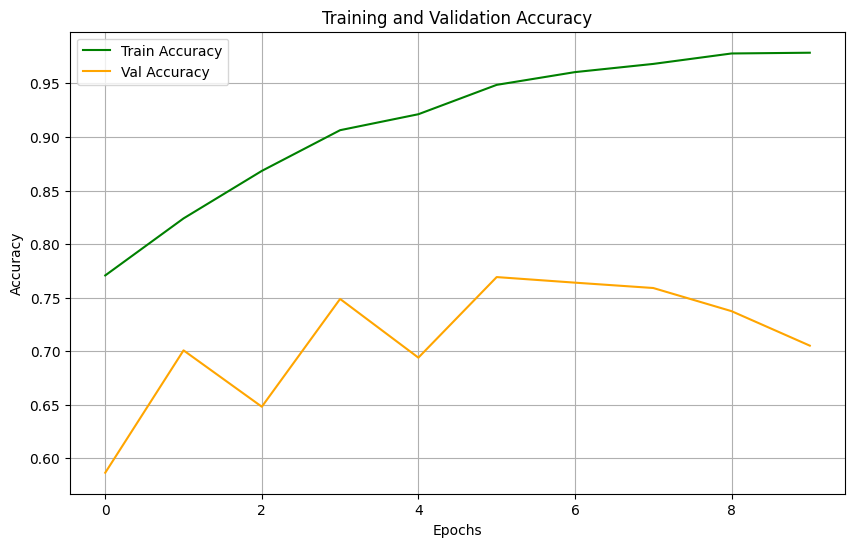

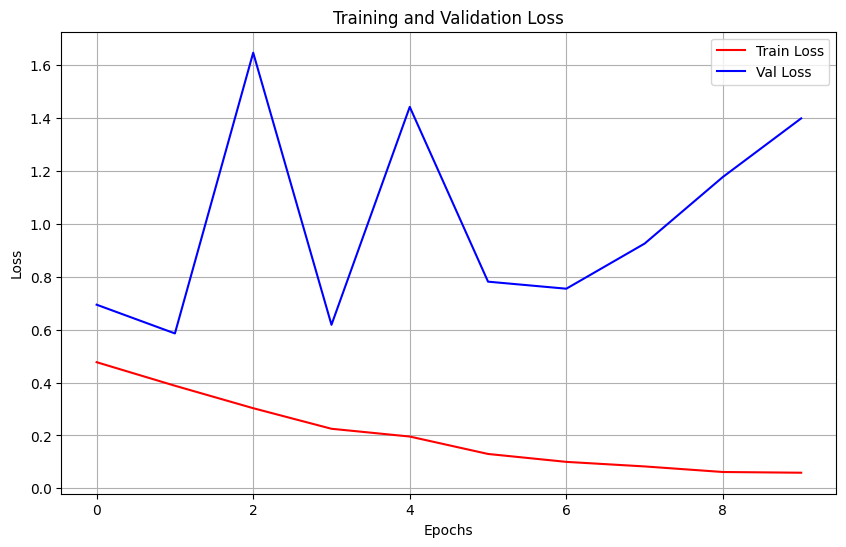

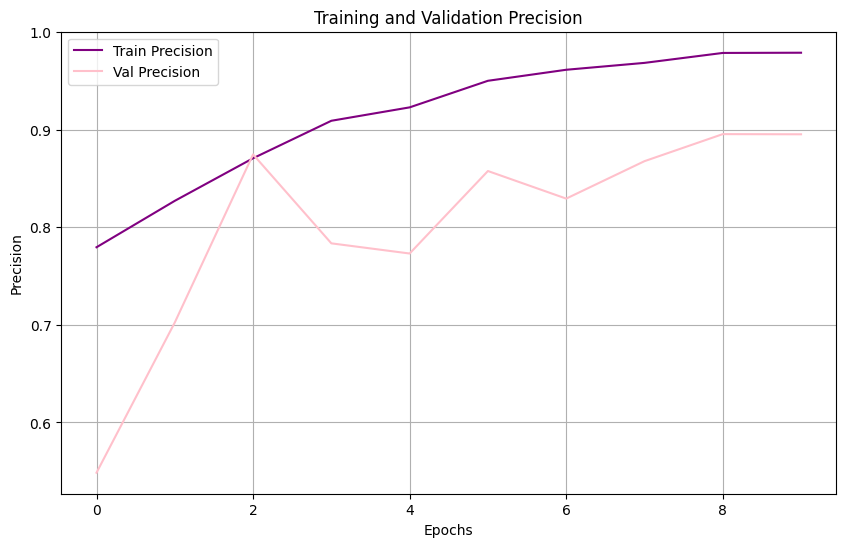

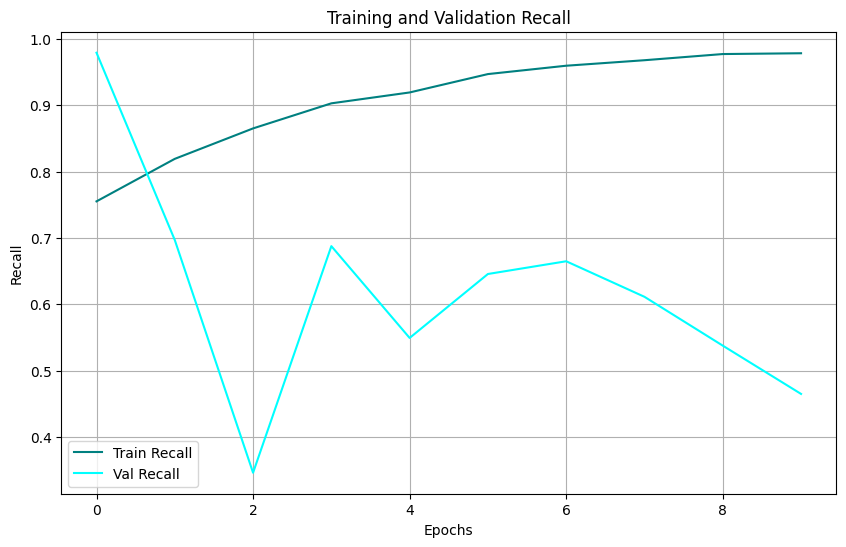

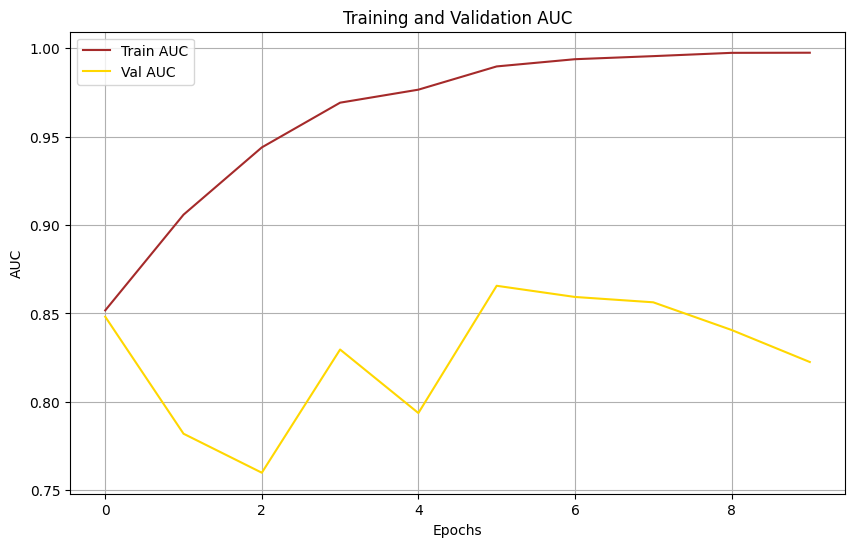

In [16]:
import matplotlib.pyplot as plt

# Store metrics in variables for cleaner code
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']
auc = history.history['auc']
val_auc = history.history['val_auc']

epochs_range = range(len(acc))

# 1. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, acc, label='Train Accuracy', color='green')
plt.plot(epochs_range, val_acc, label='Val Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 2. Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, loss, label='Train Loss', color='red')
plt.plot(epochs_range, val_loss, label='Val Loss', color='blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 3. Precision
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, precision, label='Train Precision', color='purple')
plt.plot(epochs_range, val_precision, label='Val Precision', color='pink')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# 4. Recall
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, recall, label='Train Recall', color='teal')
plt.plot(epochs_range, val_recall, label='Val Recall', color='cyan')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

# 5. AUC
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, auc, label='Train AUC', color='brown')
plt.plot(epochs_range, val_auc, label='Val AUC', color='gold')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


**Prediction on Unseen Data-**

In [17]:
import cv2

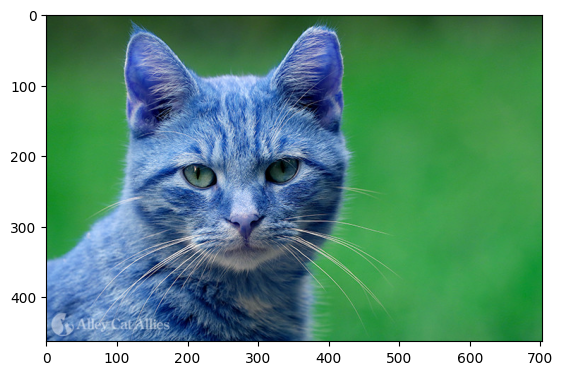

In [18]:
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [19]:
test_img.shape

(463, 703, 3)

In [20]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)